In [1]:
import numpy as np
import torch
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch import nn
from torch.autograd import Variable
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def data_tf(x):
    x=np.array(x,dtype="float32")/255 # 将数据变到0~1 之间
    x=(x-0.5)/0.5 # 标准化
    x=x.reshape((-1,)) # 拉平
    x=torch.from_numpy(x)
    return x

train_set=MNIST("./data",train=True,transform=data_tf,download=True)
test_set=MNIST("./data",train=False,transform=data_tf,download=True)

In [5]:
#loss 函数 
criterion=nn.CrossEntropyLoss()

In [6]:
def sgd_update(parameters,lr):
    for param in parameters:
        param.data=param.data-lr*param.grad.data

In [7]:
# 先将batch size 设置为1，看看有没有什么效果，再改成64，发现震荡不那么剧烈
train_data=DataLoader(train_set,batch_size=1,shuffle=True)
# 使用Sequential 定义三层神经网络
net=nn.Sequential(
    nn.Linear(784,200),
    nn.ReLU(),
    nn.Linear(200,10),
)

In [11]:
# 开始训练
losses1=[]
idx=0
start=time.time()

for e in range(5):
    train_loss=0
    for im,label in train_data:
        im=Variable(im)
        label=Variable(label)
        # 前向传播
        out=net(im)
        loss=criterion(out,label)
        # 反向传播
        net.zero_grad()
        loss.backward()
        sgd_update(net.parameters(),1e-2) # 使用0.01 的学习率
        # 记录误差
        train_loss +=loss.data.numpy()
        if idx %30 ==0:
            losses1.append(loss.data.numpy())
        idx +=1
    print(e,train_loss/len(train_data))
end=time.time()
print(start-end)

0 0.3475302638133367
1 0.21455284684499104
2 0.17564249782363572
3 0.1579562781949838
4 0.1393800068616867
-666.8412811756134


In [13]:
len(losses1)

10000

In [16]:
x_axis=np.linspace(0,5,len(losses1),endpoint=True)

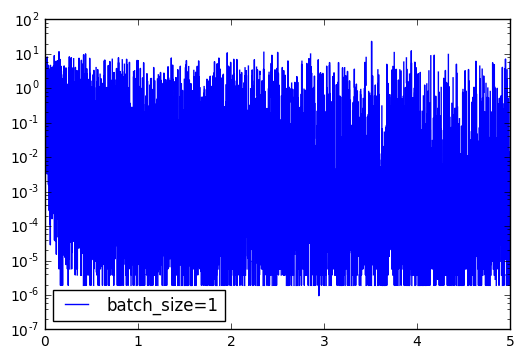

In [17]:
plt.semilogy(x_axis,losses1,label="batch_size=1")
plt.legend(loc="best")

In [ ]:
# batch_size改成64，发现震荡不那么剧烈
# 如果batch_size 太大，对于内存的需求更高，同时不利于网络跳出局部极小点，


In [ ]:
# 使用pytorch 自带的优化器 实现梯度下降
train_data=DataLoader(train_set,batch_size=64,shuffle=True)
# 使用Sequential 定义三层神经网络
net=nn.Sequential(
    nn.Linear(784,200),
    nn.ReLU(),
    nn.Linear(200,10),
)

In [18]:
optimzier=torch.optim.SGD(net.parameters(),1e-2)

start=time.time()

In [ ]:
for e in range(5):
    train_loss=0
    for im,label in train_data:
        im=Variable(im)
        label=Variable(label)
        # 前向传播
        out=net(im)
        loss=criterion(out,label)
        # 反向传播
        net.zero_grad()
        loss.backward()